## Importing required Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Reading the Dataset

In [4]:
dataset = pd.read_csv("dataset.csv")

In [5]:
dataset.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


## Renaming of columns

In [6]:
dataset.rename(
    columns = {
        "having_IPhaving_IP_Address": "having_IP_address",
        "URLURL_Length": "url_Length",
        "Shortining_Service": "shortening_service",
        "Prefix_Suffix": "prefix_suffix",
        "having_Sub_Domain": "having_sub_domain",
        "SSLfinal_State": "SSL_final_State",
        "Domain_registeration_length": "domain_registration_length",
        "Favicon": "favicon",
        "Request_URL": "request_URL",
        "URL_of_Anchor": "URL_of_anchor",
        "Links_in_tags": "links_in_tags",
        "Submitting_to_email": "submitting_to_email",
        "Abnormal_URL": "abnormal_URL",
        "Redirect": "redirect",
        "RightClick": "right_click",
        "popUpWidnow": "pop_up_window",
        "DNSRecord": "DNS_record",
        "Page_Rank": "page_rank",
        "Google_Index": "google_index",
        "Links_pointing_to_page": "links_pointing_to_page",
        "Statistical_report": "statistical_report",
        "Result": "result"
    },
    inplace = True
)

In [7]:
dataset.head()

,index,having_IP_address,url_Length,shortening_service,having_At_Symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,SSL_final_State,domain_registration_length,...,pop_up_window,Iframe,age_of_domain,DNS_record,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


## Handling Null Values

In [8]:
dataset.isnull()

,index,having_IP_address,url_Length,shortening_service,having_At_Symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,SSL_final_State,domain_registration_length,...,pop_up_window,Iframe,age_of_domain,DNS_record,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11052,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11053,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
dataset.isnull().any()

index                         False
having_IP_address             False
url_Length                    False
shortening_service            False
having_At_Symbol              False
double_slash_redirecting      False
prefix_suffix                 False
having_sub_domain             False
SSL_final_State               False
domain_registration_length    False
favicon                       False
port                          False
HTTPS_token                   False
request_URL                   False
URL_of_anchor                 False
links_in_tags                 False
SFH                           False
submitting_to_email           False
abnormal_URL                  False
redirect                      False
on_mouseover                  False
right_click                   False
pop_up_window                 False
Iframe                        False
age_of_domain                 False
DNS_record                    False
web_traffic                   False
page_rank                   

In [10]:
dataset.isnull().sum()

index                         0
having_IP_address             0
url_Length                    0
shortening_service            0
having_At_Symbol              0
double_slash_redirecting      0
prefix_suffix                 0
having_sub_domain             0
SSL_final_State               0
domain_registration_length    0
favicon                       0
port                          0
HTTPS_token                   0
request_URL                   0
URL_of_anchor                 0
links_in_tags                 0
SFH                           0
submitting_to_email           0
abnormal_URL                  0
redirect                      0
on_mouseover                  0
right_click                   0
pop_up_window                 0
Iframe                        0
age_of_domain                 0
DNS_record                    0
web_traffic                   0
page_rank                     0
google_index                  0
links_pointing_to_page        0
statistical_report            0
result  

From the above data, we can conclude that there are no null values in any fields. Hence, handling of null values in not needed.

## Understanding the Dataset

In [11]:
dataset.head()

,index,having_IP_address,url_Length,shortening_service,having_At_Symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,SSL_final_State,domain_registration_length,...,pop_up_window,Iframe,age_of_domain,DNS_record,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [12]:
dataset['result'].value_counts()

 1    6157
-1    4898
Name: result, dtype: int64

In [13]:
dataset.describe()

,index,having_IP_address,url_Length,shortening_service,having_At_Symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,SSL_final_State,domain_registration_length,...,pop_up_window,Iframe,age_of_domain,DNS_record,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   index                       11055 non-null  int64
 1   having_IP_address           11055 non-null  int64
 2   url_Length                  11055 non-null  int64
 3   shortening_service          11055 non-null  int64
 4   having_At_Symbol            11055 non-null  int64
 5   double_slash_redirecting    11055 non-null  int64
 6   prefix_suffix               11055 non-null  int64
 7   having_sub_domain           11055 non-null  int64
 8   SSL_final_State             11055 non-null  int64
 9   domain_registration_length  11055 non-null  int64
 10  favicon                     11055 non-null  int64
 11  port                        11055 non-null  int64
 12  HTTPS_token                 11055 non-null  int64
 13  request_URL                 11055 non-null  int64
 14  URL_of

## Feature Selection

### Correlation

In [15]:
dataset['index'].corr(dataset['result'])

0.000977679869812651

In [16]:
dataset['age_of_domain'].corr(dataset['result'])

0.12149641654726277

In [17]:
dataset['having_IP_address'].corr(dataset['result'])

0.09416009495620394

### Correlation Heatmap

In [18]:
dataset.corr()

,index,having_IP_address,url_Length,shortening_service,having_At_Symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,SSL_final_State,domain_registration_length,...,pop_up_window,Iframe,age_of_domain,DNS_record,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
index,1.000000,-0.388317,0.006105,-0.006281,-0.169478,-0.003363,-0.007340,0.234091,-0.006682,-0.001180,...,0.006515,0.002533,0.115320,0.400890,-0.014900,0.065117,-0.012527,0.002442,0.163799,0.000978
having_IP_address,-0.388317,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,...,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
url_Length,0.006105,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,...,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
shortening_service,-0.006281,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,...,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,-0.169478,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,...,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,-0.003363,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,...,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
prefix_suffix,-0.007340,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,...,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_sub_domain,0.234091,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,...,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSL_final_State,-0.006682,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,...,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
domain_registration_length,-0.001180,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,...,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789


<AxesSubplot:>

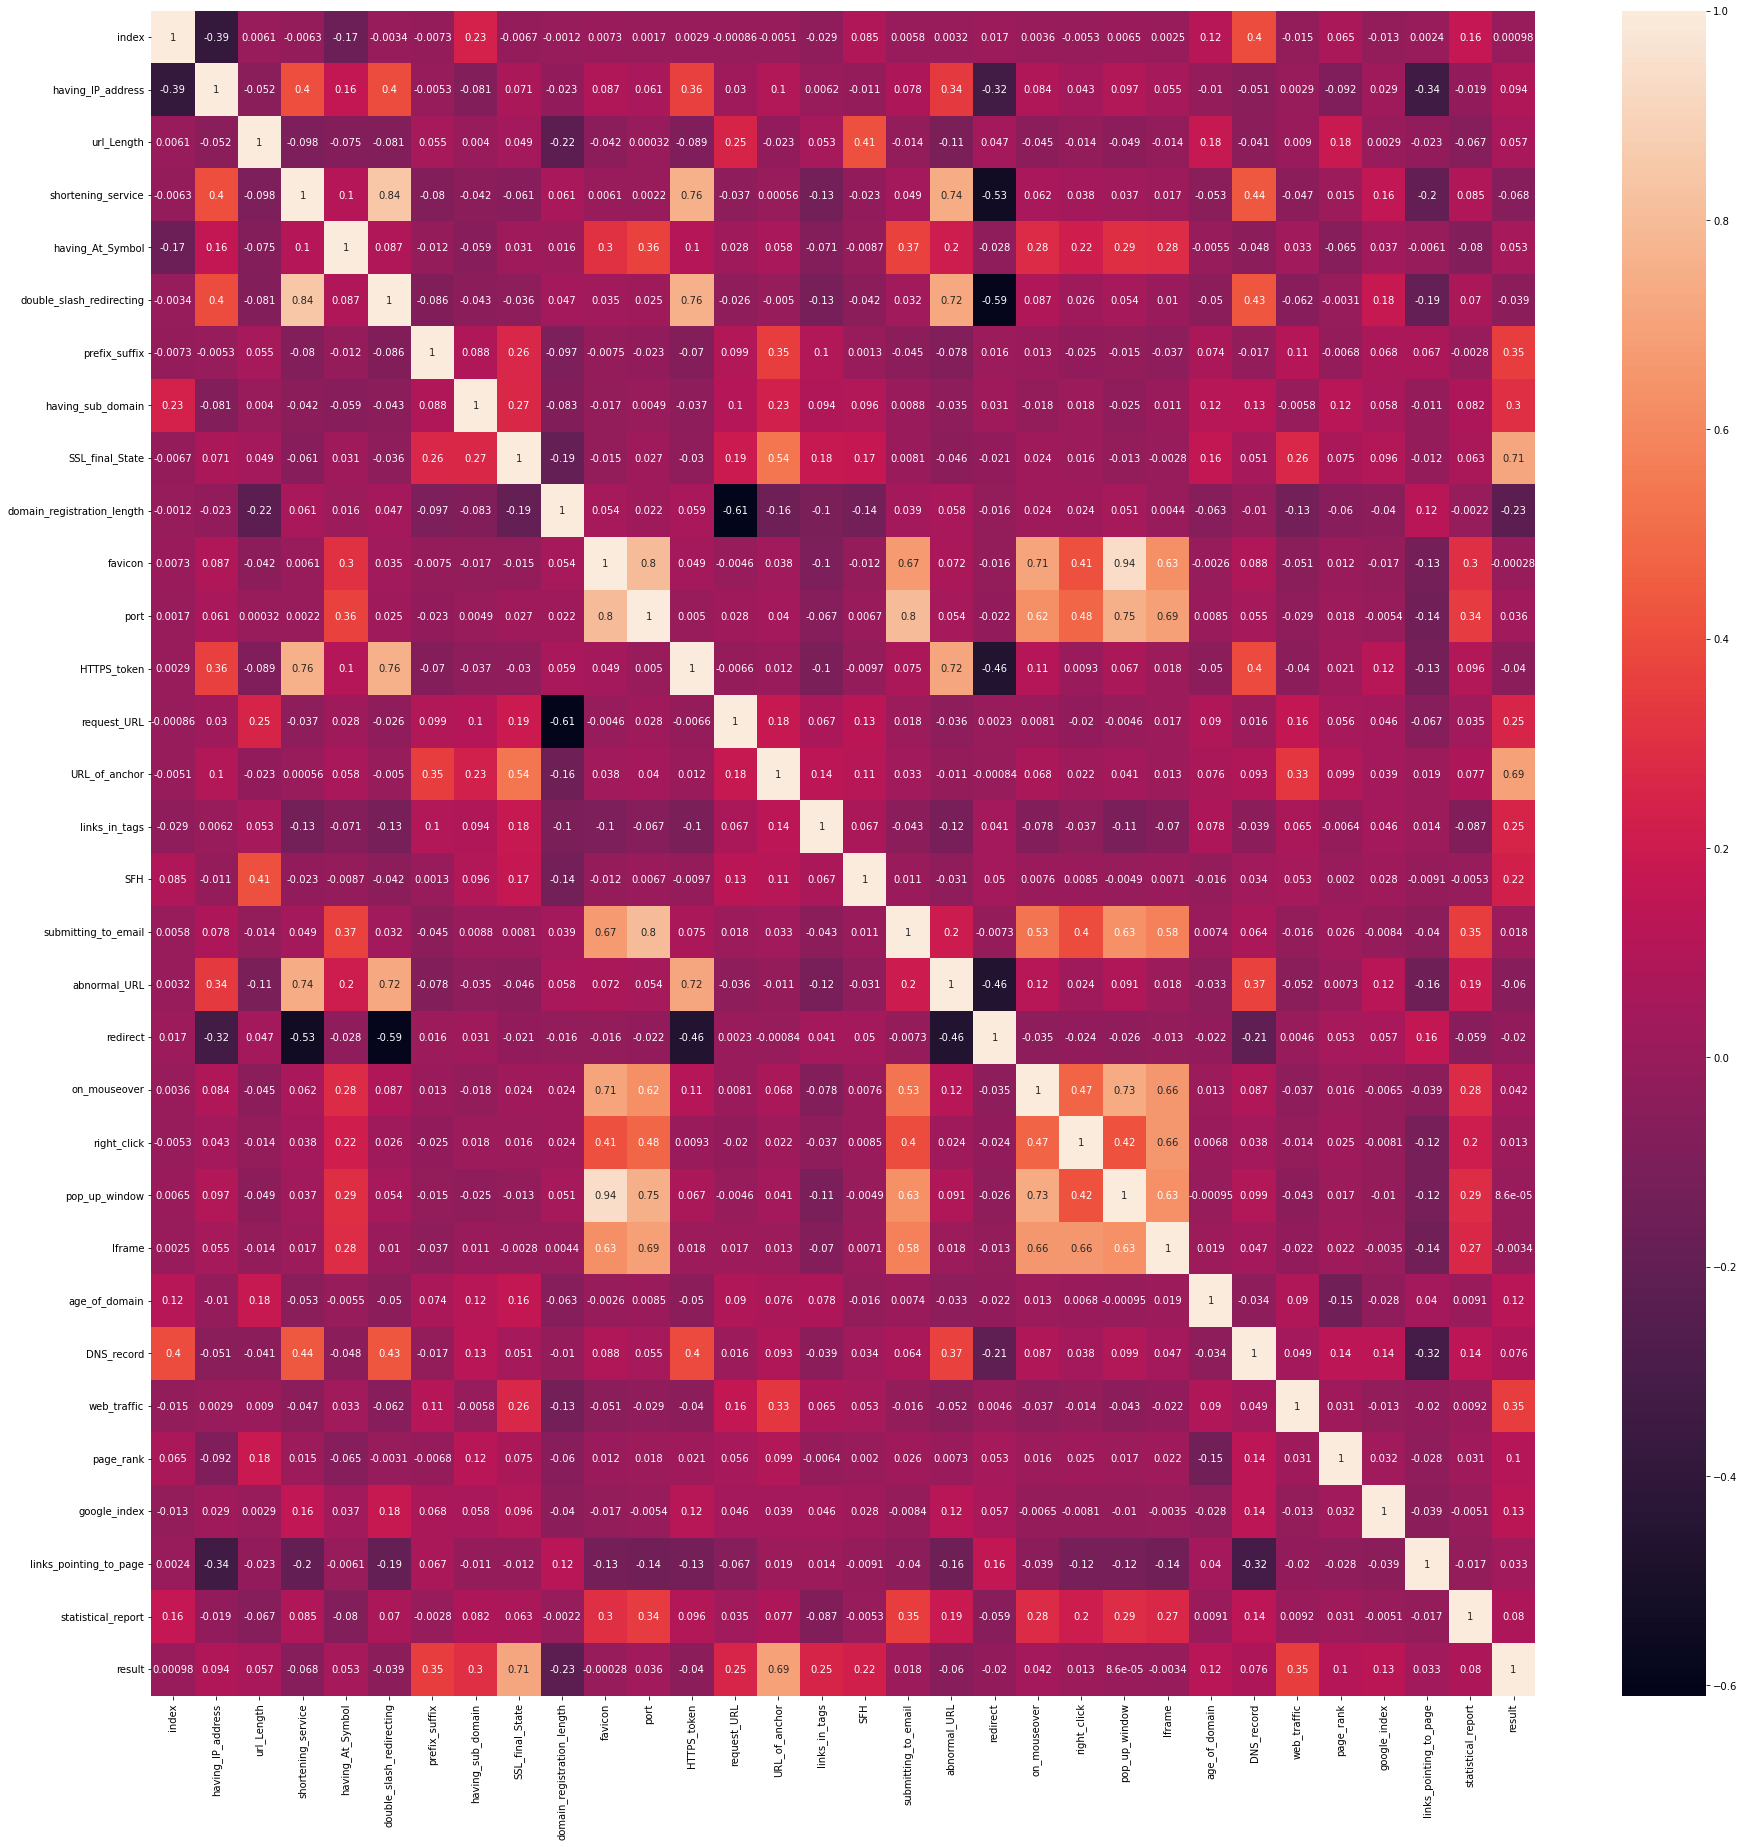

In [19]:
plt.subplots(figsize=(31,31))
sns.heatmap(dataset.corr(), annot = True)

From the above Heatmap, it is clear that the the columns "index", "favicon", "pop_up_window" and "IFrame", does not correlate much with the label "result". Hence, these columns can be removed from the features

## Removing columns

In [20]:
newDataset = dataset.drop(["index", "favicon", "pop_up_window", "Iframe"], axis = 1)

In [21]:
# number of columns in the dataset before removing
len(dataset.columns)

32

In [22]:
# number of columns in the dataset after removing some columns
len(newDataset.columns)

28

## Splitting the dataset

### Splitting into features and labels

In [23]:
features = dataset.iloc[:, :-1]
labels = dataset.iloc[:, -1]

In [24]:
features.head()

,index,having_IP_address,url_Length,shortening_service,having_At_Symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,SSL_final_State,domain_registration_length,...,right_click,pop_up_window,Iframe,age_of_domain,DNS_record,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,5,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [25]:
labels.head()

0   -1
1   -1
2   -1
3   -1
4    1
Name: result, dtype: int64

### Splitting the dataset into train and test data

In [26]:
featuresTraining, featuresTesting, labelsTraining, labelsTesting = train_test_split(features, labels, test_size = 1/3, random_state = 369)

In [27]:
featuresTraining

,index,having_IP_address,url_Length,shortening_service,having_At_Symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,SSL_final_State,domain_registration_length,...,right_click,pop_up_window,Iframe,age_of_domain,DNS_record,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
3172,3173,1,-1,1,1,1,-1,0,1,-1,...,1,1,1,-1,1,1,-1,1,0,1
10506,10507,-1,-1,1,-1,1,-1,0,-1,1,...,1,-1,-1,1,1,0,-1,1,1,1
3025,3026,1,-1,1,1,1,-1,1,1,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1
3803,3804,1,-1,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
5718,5719,1,-1,1,-1,1,-1,0,0,1,...,1,-1,-1,-1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7098,7099,1,-1,1,1,1,-1,0,1,-1,...,1,1,1,-1,1,0,1,1,0,1
4370,4371,1,1,1,-1,1,-1,0,-1,-1,...,1,1,1,-1,-1,-1,-1,-1,1,1
1389,1390,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,0,-1,1,-1,1
270,271,1,-1,1,1,1,-1,0,-1,-1,...,1,1,1,-1,1,1,-1,1,0,1


In [28]:
featuresTesting

,index,having_IP_address,url_Length,shortening_service,having_At_Symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,SSL_final_State,domain_registration_length,...,right_click,pop_up_window,Iframe,age_of_domain,DNS_record,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
8307,8308,1,-1,1,1,1,-1,0,1,1,...,1,1,1,1,1,1,-1,1,0,1
5196,5197,-1,-1,-1,-1,-1,-1,1,1,-1,...,1,1,1,-1,-1,-1,1,1,0,1
9876,9877,1,-1,1,1,1,-1,0,-1,-1,...,1,1,1,1,1,0,-1,-1,0,1
1221,1222,1,1,1,1,1,1,0,1,-1,...,1,1,1,-1,1,0,-1,-1,0,1
3346,3347,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10703,10704,1,-1,1,-1,1,-1,-1,-1,1,...,1,1,1,1,1,1,-1,-1,0,-1
1429,1430,1,1,1,1,1,-1,0,-1,-1,...,1,-1,1,-1,1,1,-1,1,0,1
5416,5417,1,-1,1,-1,1,-1,1,1,-1,...,1,1,1,-1,1,1,1,1,0,1
10255,10256,-1,1,1,1,1,-1,1,-1,1,...,1,1,1,1,1,0,1,-1,1,1


## Downloading the pre-processed Dataset in .csv format

In [29]:
newDataset.to_csv("cleaned_dateset.csv")